In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Ice_Cream_Selling.csv')

In [3]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [5]:
df.shape

(49, 2)

In [6]:
df.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

In [7]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


<font size="6" color='pink'>Visualization</font>

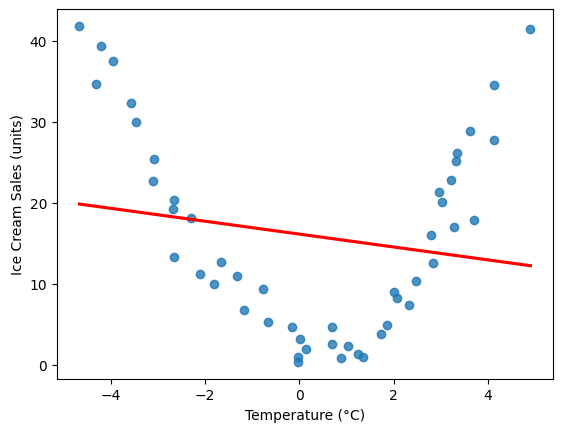

In [32]:
xpoints = df['Temperature (°C)']
ypoints = df['Ice Cream Sales (units)']
sns.regplot(x=xpoints, y=ypoints, line_kws={'color': 'red'}, ci=0)
plt.show()

<font size="6" color='pink'>Data Splitting</font>

In [9]:
X = df['Temperature (°C)'].values.reshape(-1,1)
y = df['Ice Cream Sales (units)']

In [10]:
type(X)

numpy.ndarray

In [11]:
type(y)

pandas.core.series.Series

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(f'Length of X_train is {len(X_train)}')
print(f'Length of X_test is {len(X_test)}')
print(f'Length of y_train is {len(y_train)}')
print(f'Length of y_test is {len(y_test)}')

Length of X_train is 39
Length of X_test is 10
Length of y_train is 39
Length of y_test is 10


In [14]:
print(X_test.shape)
print(y_test.shape)

(10, 1)
(10,)


<font size="6" color='pink'>Creating Polynomial Features</font>

In [15]:
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [16]:
X_train[0]

array([ 1.        , -2.11186969,  4.45999359])

<font size="6" color='pink'>Model Training</font>

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)
len(y_pred)

10

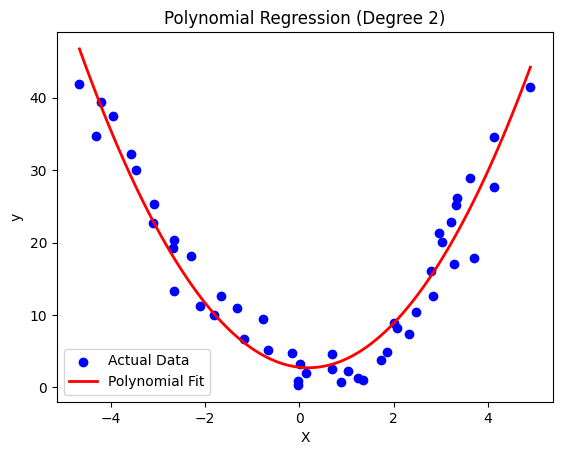

In [34]:
X_curve = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # Evenly spaced points
X_curve_poly = poly.transform(X_curve)  # Transform for polynomial features
y_curve = model.predict(X_curve_poly)  # Predict values

# Plot
plt.scatter(X, y, color='blue', label="Actual Data")  # Scatter plot of original data
plt.plot(X_curve, y_curve, color='red', linewidth=2, label="Polynomial Fit")  # Best-fit curve
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Polynomial Regression (Degree {2})")
plt.legend()
plt.show()

<font size="6" color='pink'>Evaluation</font>

In [24]:
mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
print(f"Error rate is {mape:.2f}%")

Error rate is 68.72%


In [35]:
r2 = r2_score(y_test, y_pred)
print(f"R2_Score is {r2}%")

R2_Score is 0.843055137193884%


In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error is {mse:.2f}")

Mean Squared Error is 14.88


In [38]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error is {mae:.2f}")

Mean Absolute Error is 3.23
